In [1]:
# Calling necessary library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.metrics import roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


# Data preprocessing

In [2]:
# Storing train Dataset
# Define new variable

trainData = pd.read_csv("Training Data.csv")
trainData["Experience rate"] = trainData["CURRENT_JOB_YRS"] / trainData["Experience"]
trainData["Experience rate"] = trainData["Experience rate"].replace(np.NaN, 0)
trainData.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Experience rate
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1.000000
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.900000
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,1.000000
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1.000000
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.272727


In [3]:
# Storing X and y test Dataset
# Define new variable

xTest = pd.read_csv("Test Data.csv")
xTest["Experience rate"] = xTest["CURRENT_JOB_YRS"] / xTest["Experience"]
xTest["Experience rate"] = xTest["Experience rate"].replace(np.NaN, 0)
yTest = pd.read_csv("Sample Prediction Dataset.csv")

In [4]:
# Join them on ID

testData = pd.merge(xTest, yTest, on= xTest["ID"]).drop(["key_0", "id"], axis=1)
testData.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Experience rate,risk_flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,0.210526,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,1.000000,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,0.750000,1
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0.333333,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,0.722222,0


In [5]:
# Understanding the dimension
print("---------------- Dimension of train data ----------------")
trainRow, trainColumn = trainData.shape
print(f"Number of rows in train dataset = {trainRow}")
print(f"Number of columns in train dataset = {trainColumn}")
print("\n---------------- Dimension of test data ----------------")
testRow, testColumn = testData.shape
print(f"Number of rows in test dataset = {testRow}")
print(f"Number of columns in test dataset = {testColumn}")

---------------- Dimension of train data ----------------
Number of rows in train dataset = 252000
Number of columns in train dataset = 14

---------------- Dimension of test data ----------------
Number of rows in test dataset = 28000
Number of columns in test dataset = 14


In [6]:
# What is the type of train data?
trainData.dtypes

Id                     int64
Income                 int64
Age                    int64
Experience             int64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CITY                  object
STATE                 object
CURRENT_JOB_YRS        int64
CURRENT_HOUSE_YRS      int64
Risk_Flag              int64
Experience rate      float64
dtype: object

In [7]:
# What is the type of test data?
testData.dtypes

ID                     int64
Income                 int64
Age                    int64
Experience             int64
Married/Single        object
House_Ownership       object
Car_Ownership         object
Profession            object
CITY                  object
STATE                 object
CURRENT_JOB_YRS        int64
CURRENT_HOUSE_YRS      int64
Experience rate      float64
risk_flag              int64
dtype: object

In [8]:
# Overall view of continues features in train dataset
trainData.drop("Id", axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2.503015e+06,5.000694e+06,7477502.0,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,3.500000e+01,5.000000e+01,65.0,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.000000e+00,1.000000e+01,15.0,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.000000e+00,6.000000e+00,9.0,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,1.100000e+01,1.200000e+01,13.0,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.000000e+00,0.000000e+00,0.0,1.0
Experience rate,252000.0,7.043951e-01,3.126850e-01,0.0,4.545455e-01,7.777778e-01,1.0,1.0


In [9]:
# Overall view of continues features in test dataset
testData.drop("ID", axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Income,28000.0,5.029563e+06,2.864938e+06,10310.0,2.545414e+06,5.046744e+06,7474639.0,9999814.0
Age,28000.0,5.005468e+01,1.712988e+01,21.0,3.500000e+01,5.000000e+01,65.0,79.0
Experience,28000.0,1.012039e+01,6.027317e+00,0.0,5.000000e+00,1.000000e+01,15.0,20.0
CURRENT_JOB_YRS,28000.0,6.339286e+00,3.645222e+00,0.0,3.000000e+00,6.000000e+00,9.0,14.0
CURRENT_HOUSE_YRS,28000.0,1.199179e+01,1.397754e+00,10.0,1.100000e+01,1.200000e+01,13.0,14.0
Experience rate,28000.0,7.018244e-01,3.118774e-01,0.0,4.545455e-01,7.692308e-01,1.0,1.0
risk_flag,28000.0,1.283214e-01,3.344533e-01,0.0,0.000000e+00,0.000000e+00,0.0,1.0


In [10]:
# Checking duplicate records in train data
trainId = pd.unique(trainData["Id"])
print(f"There are {trainData.duplicated().sum()} duplicated records")
if trainId[-1:] == trainRow :
    print("All of records are unique")

else:
    print("There is some duplicate records !")



There are 0 duplicated records
All of records are unique


In [11]:
# Checking duplicate records in test data
testId = pd.unique(testData["ID"])
print(f"There are {testData.duplicated().sum()} duplicated records")
if testId[-1:] == testRow :
    print("All of records are unique")

else:
    print("There is some duplicate records !")

There are 0 duplicated records
All of records are unique


In [12]:
# Checking missing values in train data
trainData.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Experience rate      0
dtype: int64

In [13]:
# Checking missing values in test data
testData.isnull().sum()

ID                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Experience rate      0
risk_flag            0
dtype: int64

In [14]:
# Or checking missing values with info() in train data
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 252000 non-null  int64  
 1   Income             252000 non-null  int64  
 2   Age                252000 non-null  int64  
 3   Experience         252000 non-null  int64  
 4   Married/Single     252000 non-null  object 
 5   House_Ownership    252000 non-null  object 
 6   Car_Ownership      252000 non-null  object 
 7   Profession         252000 non-null  object 
 8   CITY               252000 non-null  object 
 9   STATE              252000 non-null  object 
 10  CURRENT_JOB_YRS    252000 non-null  int64  
 11  CURRENT_HOUSE_YRS  252000 non-null  int64  
 12  Risk_Flag          252000 non-null  int64  
 13  Experience rate    252000 non-null  float64
dtypes: float64(1), int64(7), object(6)
memory usage: 26.9+ MB


In [15]:
# Or checking missing values with info() in test data
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 27999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 28000 non-null  int64  
 1   Income             28000 non-null  int64  
 2   Age                28000 non-null  int64  
 3   Experience         28000 non-null  int64  
 4   Married/Single     28000 non-null  object 
 5   House_Ownership    28000 non-null  object 
 6   Car_Ownership      28000 non-null  object 
 7   Profession         28000 non-null  object 
 8   CITY               28000 non-null  object 
 9   STATE              28000 non-null  object 
 10  CURRENT_JOB_YRS    28000 non-null  int64  
 11  CURRENT_HOUSE_YRS  28000 non-null  int64  
 12  Experience rate    28000 non-null  float64
 13  risk_flag          28000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 3.2+ MB


**Checking outlier**

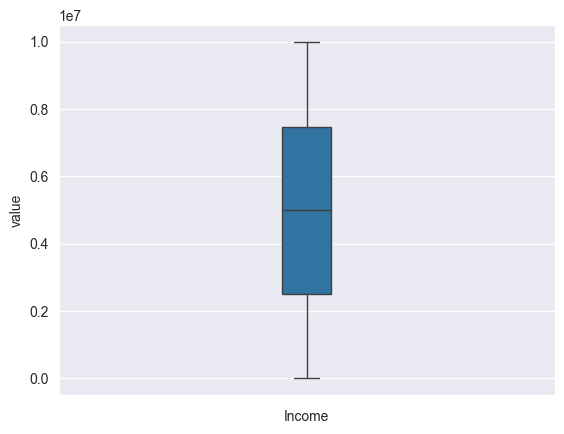

In [16]:
# Checking outlier

sns.boxplot(trainData.Income, width=0.1)
plt.xlabel("Income")
plt.ylabel("value")
plt.show()

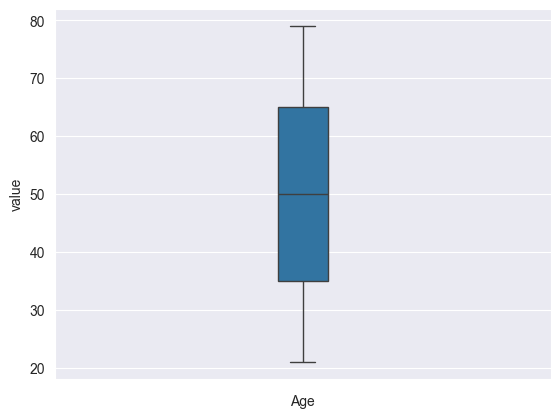

In [17]:
# Checking outlier

sns.boxplot(trainData.Age, width=0.1)
plt.xlabel("Age")
plt.ylabel("value")
plt.show()

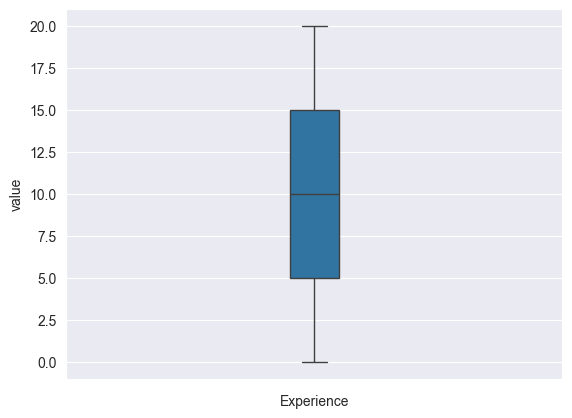

In [18]:
# Checking outlier

sns.boxplot(trainData.Experience, width=0.1)
plt.xlabel("Experience")
plt.ylabel("value")
plt.show()

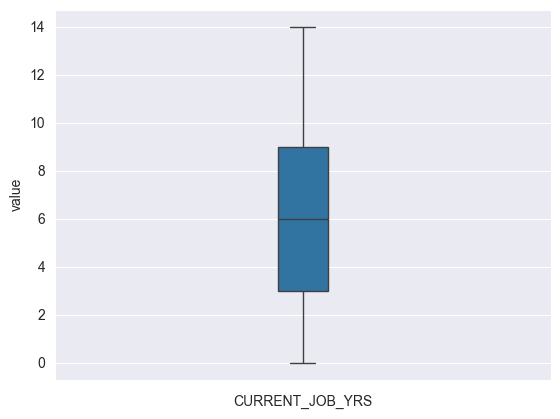

In [19]:
# Checking outlier

sns.boxplot(trainData.CURRENT_JOB_YRS, width=0.1)
plt.xlabel("CURRENT_JOB_YRS")
plt.ylabel("value")
plt.show()

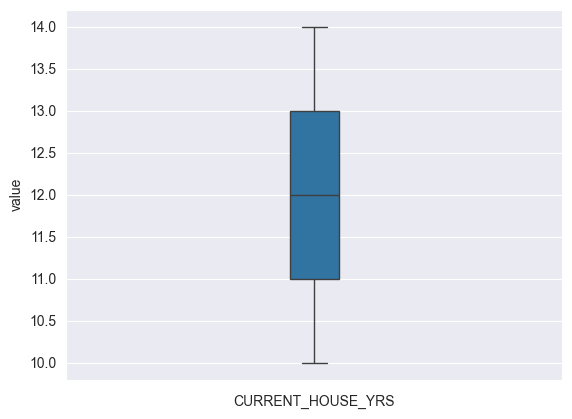

In [20]:
# Checking outlier

sns.boxplot(trainData.CURRENT_HOUSE_YRS, width=0.1)
plt.xlabel("CURRENT_HOUSE_YRS")
plt.ylabel("value")
plt.show()

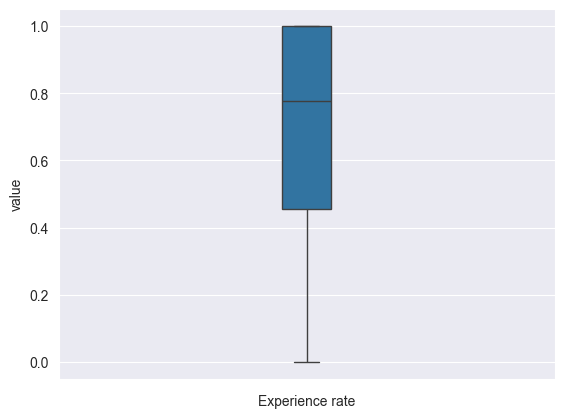

In [21]:
# Checking outlier

sns.boxplot(trainData["Experience rate"] , width=0.1)
plt.xlabel("Experience rate")
plt.ylabel("value")
plt.show()

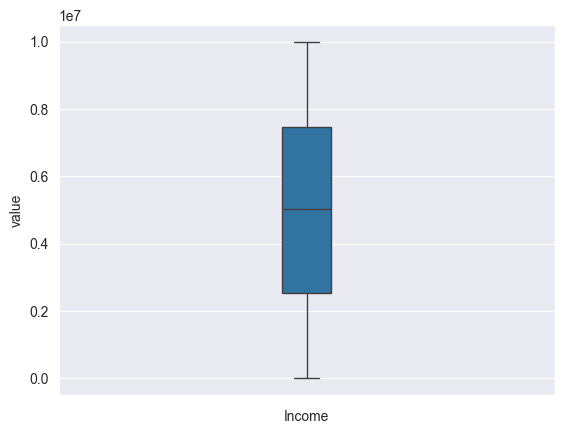

In [22]:
# Checking outlier

sns.boxplot(testData.Income, width=0.1)
plt.xlabel("Income")
plt.ylabel("value")
plt.show()

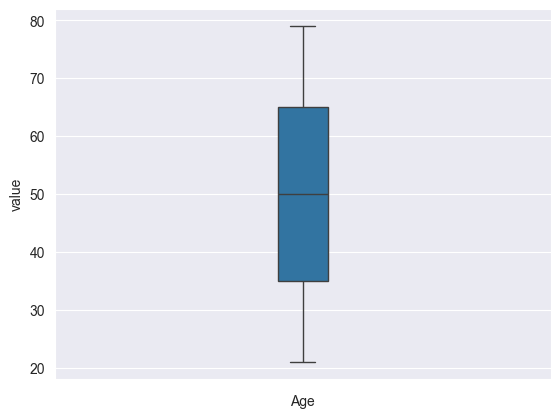

In [23]:
# Checking outlier

sns.boxplot(testData.Age, width=0.1)
plt.xlabel("Age")
plt.ylabel("value")
plt.show()

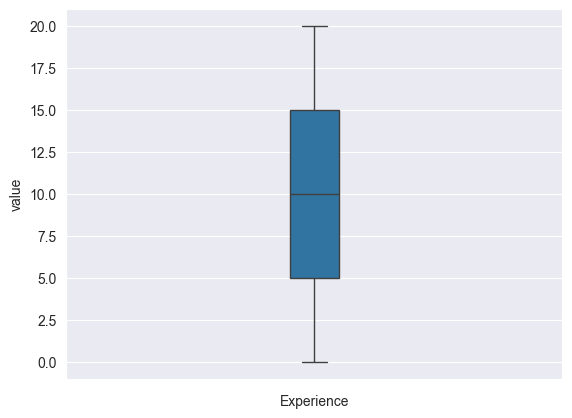

In [24]:
# Checking outlier

sns.boxplot(trainData.Experience, width=0.1)
plt.xlabel("Experience")
plt.ylabel("value")
plt.show()

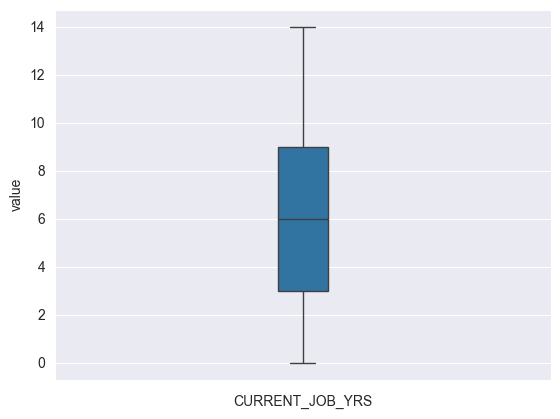

In [25]:
# Checking outlier

sns.boxplot(trainData.CURRENT_JOB_YRS, width=0.1)
plt.xlabel("CURRENT_JOB_YRS")
plt.ylabel("value")
plt.show()

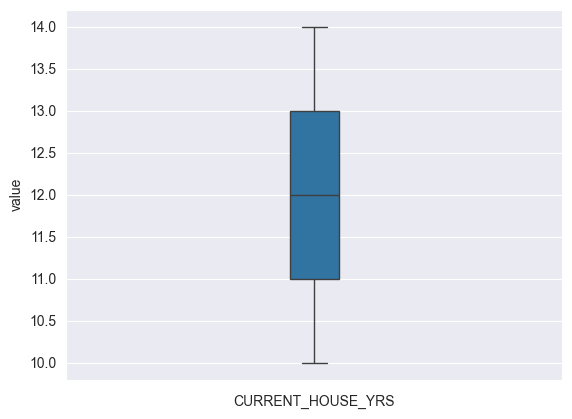

In [26]:
# Checking outlier

sns.boxplot(trainData.CURRENT_HOUSE_YRS, width=0.1)
plt.xlabel("CURRENT_HOUSE_YRS")
plt.ylabel("value")
plt.show()

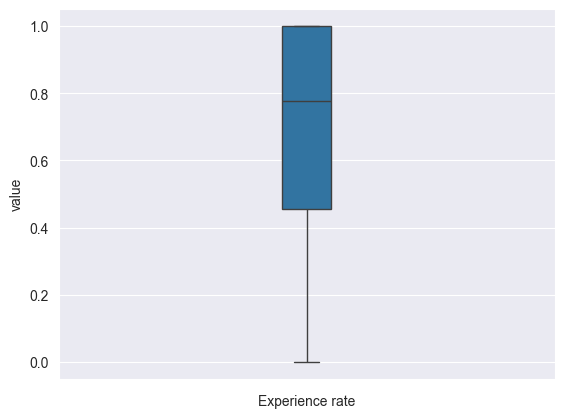

In [27]:
# Checking outlier

sns.boxplot(trainData["Experience rate"], width=0.1)
plt.xlabel("Experience rate")
plt.ylabel("value")
plt.show()

# Visualization

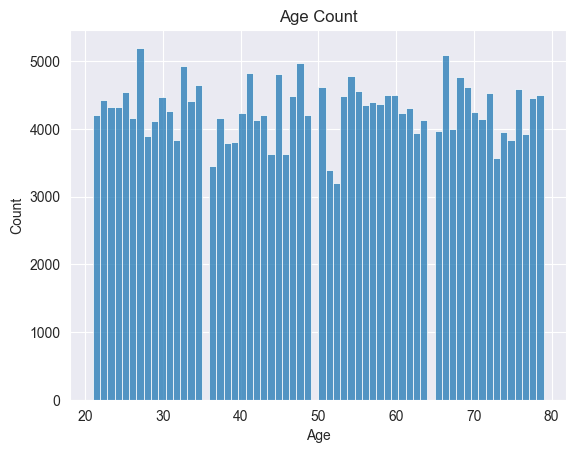

In [28]:
# Histogram of age
sns.histplot(trainData.Age)
plt.xlabel("Age")
plt.title("Age Count")
plt.show()

In [29]:
# Cross tab in current job year and house ownership
crossJobHouse = pd.crosstab([trainData.CURRENT_JOB_YRS], trainData.House_Ownership)
crossJobHouse

House_Ownership,norent_noown,owned,rented
CURRENT_JOB_YRS,,,
0,489,386,10168
1,155,394,11026
2,425,619,10043
3,563,2081,26816
4,774,1716,25849
5,925,1022,23144
6,715,1152,21624
7,491,673,18761
8,449,837,17588


In [30]:
# Risk flag based on Profession - in percent

trainData.groupby('Profession').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

Profession
Police_officer                16.405164
Chartered_Accountant          15.357222
Army_officer                  15.211328
Surveyor                      15.146373
Software_Developer            14.842668
Scientist                     14.432127
Geologist                     14.426370
Civil_engineer                13.583189
Official                      13.579643
Firefighter                   13.578877
Air_traffic_controller        13.539102
Hotel_Manager                 13.538046
Aviator                       13.493064
Technical_writer              13.416747
Architect                     13.120034
Secretary                     13.040901
Lawyer                        12.951432
Computer_hardware_engineer    12.844378
Technician                    12.828947
Biomedical_Engineer           12.755998
Consultant                    12.520799
Microbiologist                12.435976
Computer_operator             12.404810
Flight_attendant              12.363495
Artist                       

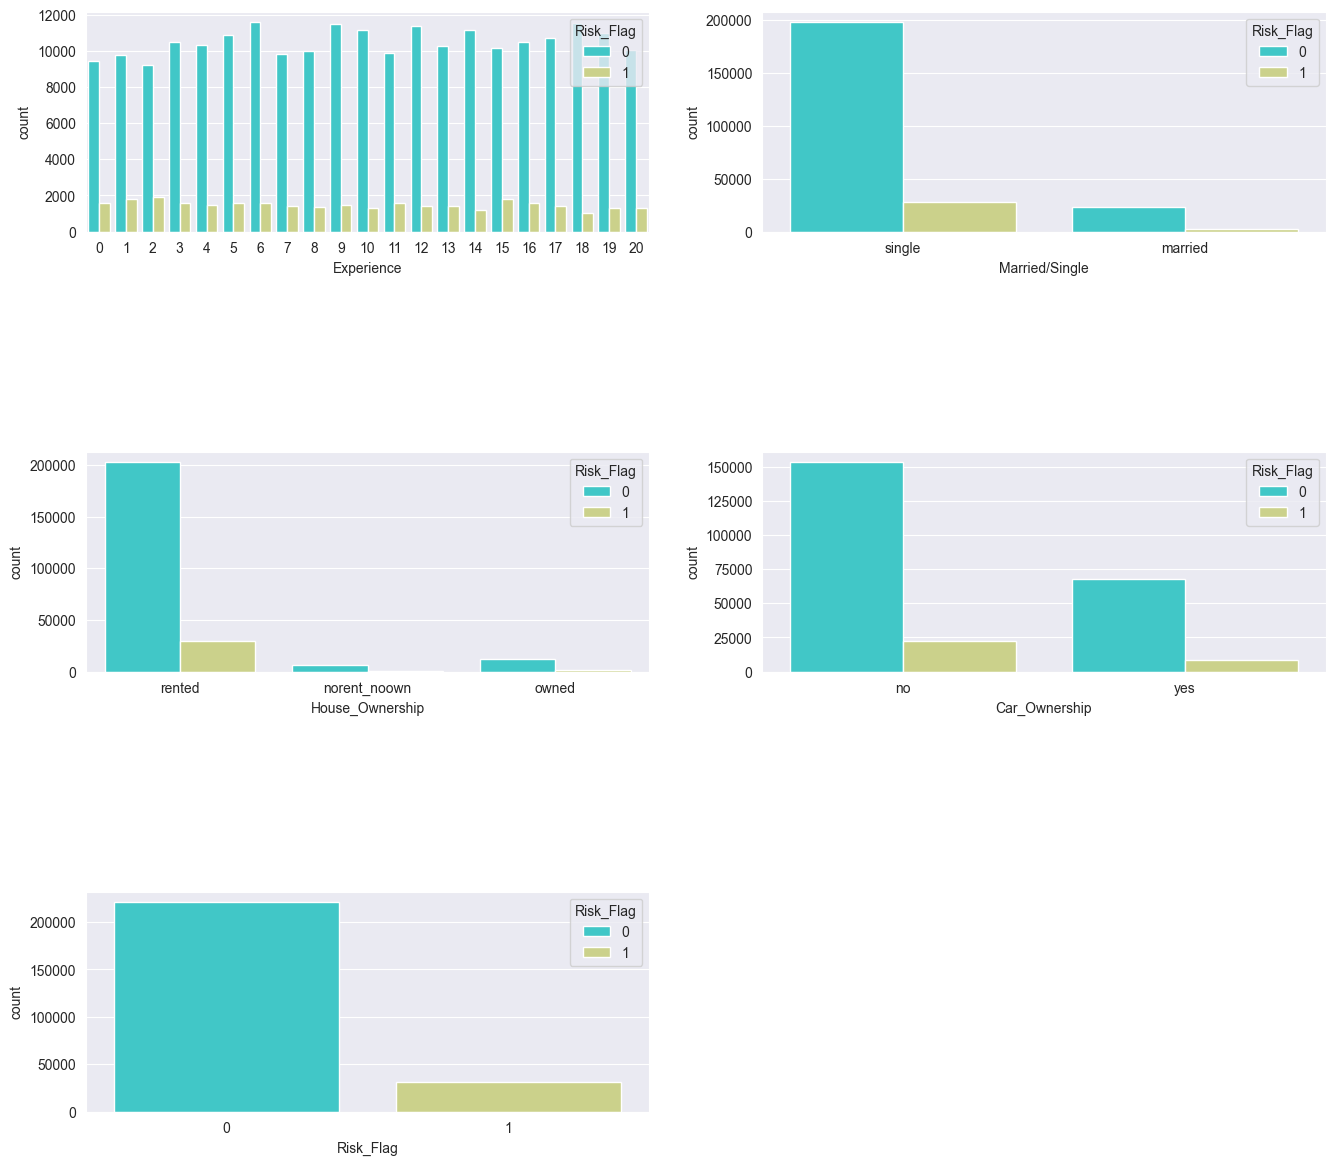

In [31]:
# Box plot for categorical features and risk flag
features=["Experience",	"Married/Single",	"House_Ownership",	"Car_Ownership", "Risk_Flag"]
fig=plt.subplots(figsize=(16,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = trainData,hue='Risk_Flag',palette = 'rainbow')

plt.show()

In [32]:
# Profession frequency
trainData.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

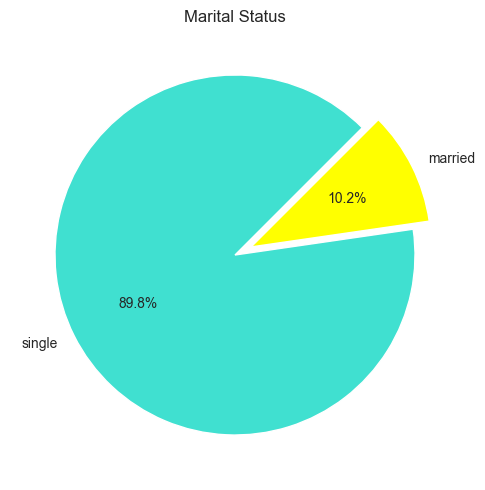

In [33]:
# Marital status bar plot
MaritalStatus = trainData['Married/Single'].value_counts()
plt.pie(MaritalStatus, labels = MaritalStatus.index, autopct='%1.1f%%', startangle=45, explode=(0, 0.1), colors=['turquoise', 'yellow'])
plt.tight_layout()
plt.title("Marital Status")
plt.show()

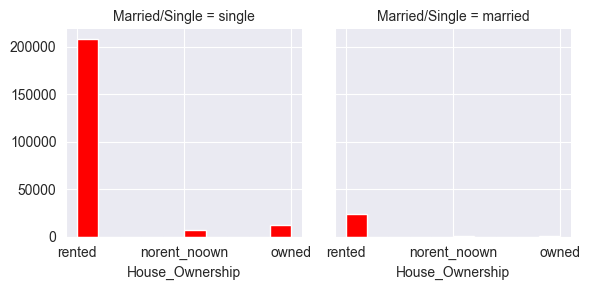

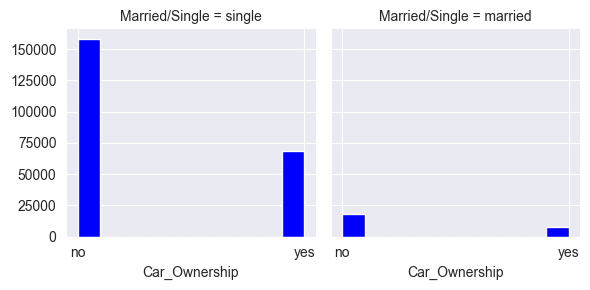

In [34]:
# House and car ownership with marital status
plot = sns.FacetGrid(trainData, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'House_Ownership', color='red')

plot = sns.FacetGrid(trainData, col='Married/Single', margin_titles=True)
plot.map(plt.hist, 'Car_Ownership', color='blue')


plt.show()

Text(0, 0.5, 'Frequency')

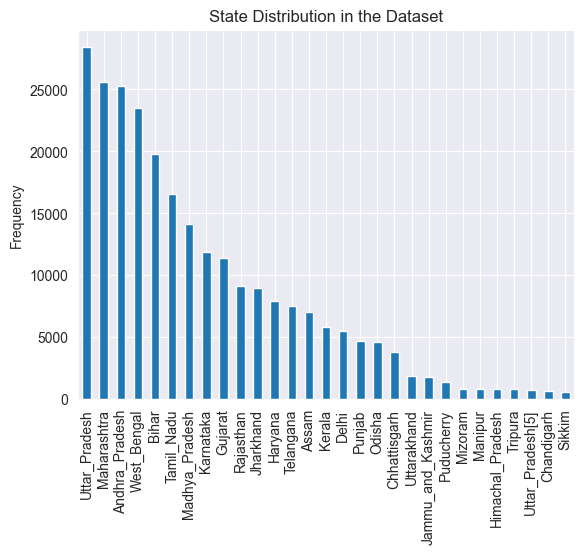

In [35]:
# State variety
stateDistribution = trainData.STATE.value_counts()
stateDistribution.plot.bar()
plt.xticks(rotation=90)
plt.title("State Distribution in the Dataset")
plt.ylabel("Frequency")

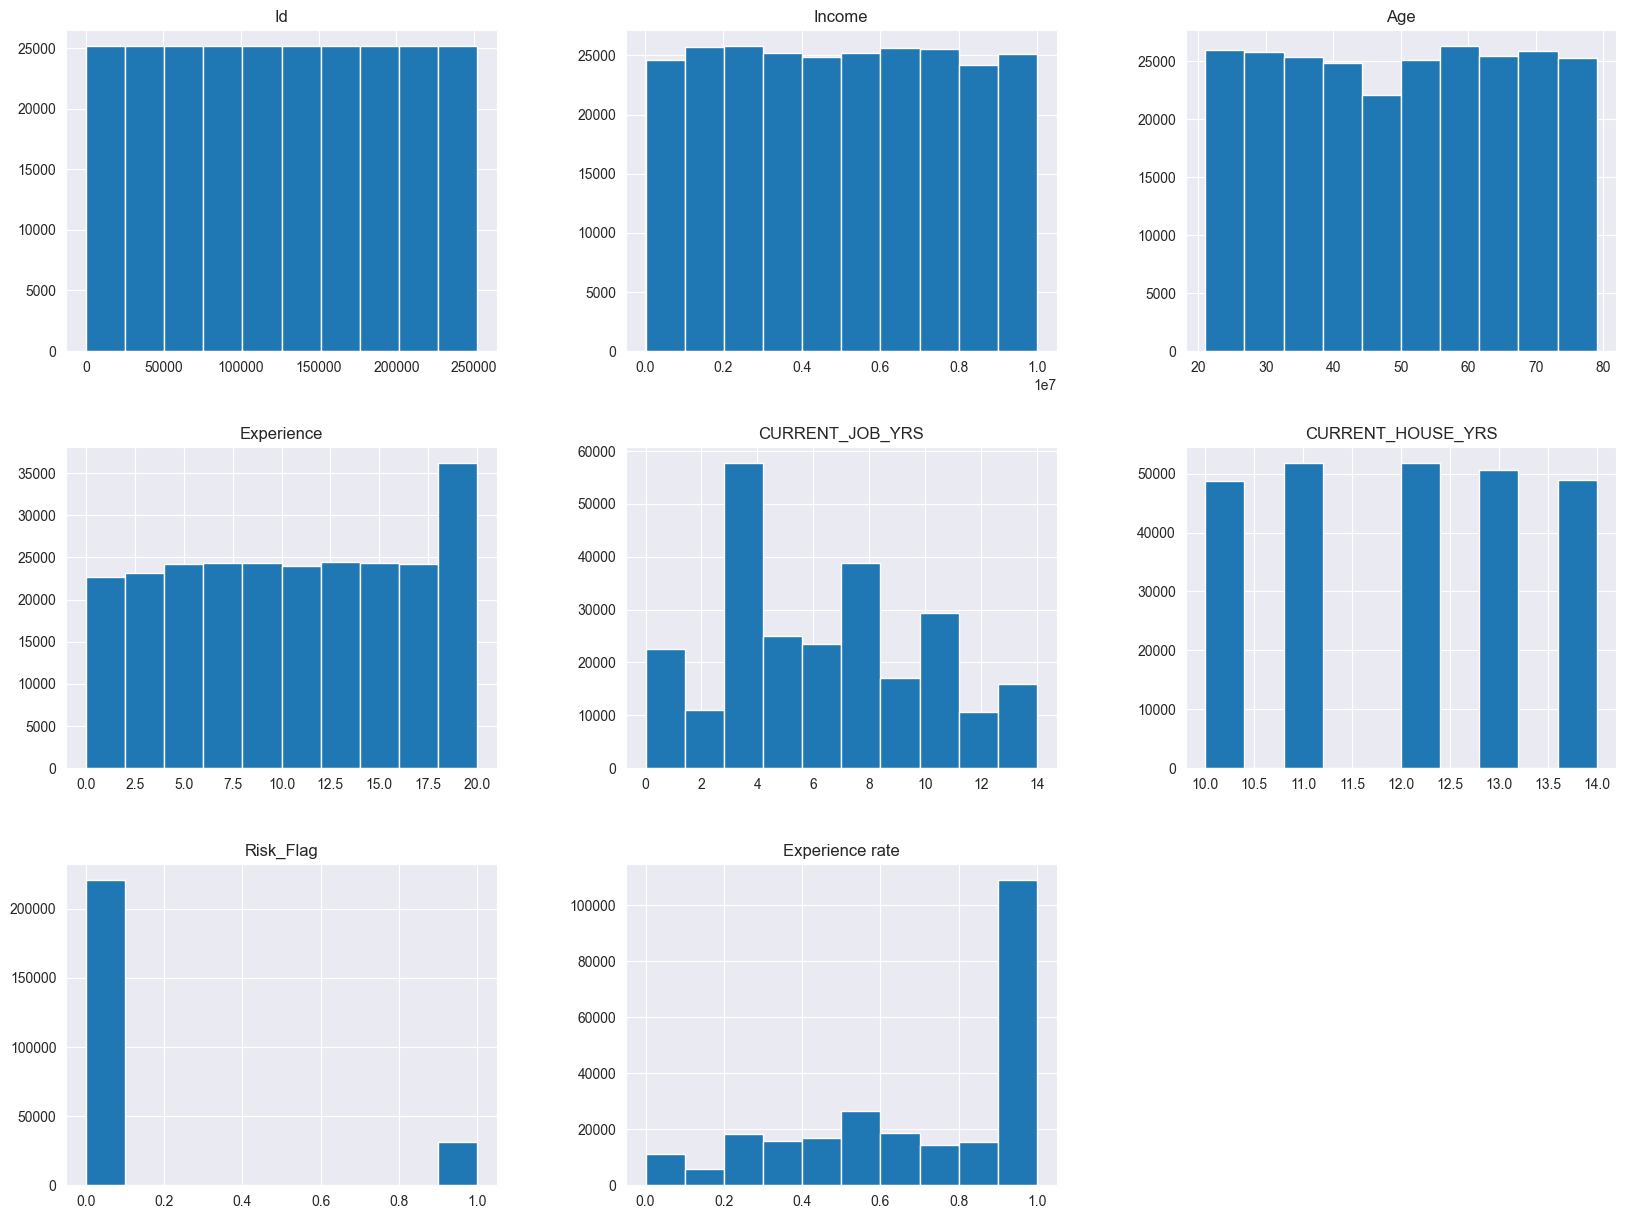

In [36]:
# Plotting continues variables in histogram

trainData.hist(figsize=(20, 15))
plt.show()

In [37]:
# Risk flag count
trainData["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

**Changing categorical feature to numeric**

In [38]:
# Knowing Married/Single value of features
trainData["Married/Single"].unique()

array(['single', 'married'], dtype=object)

In [39]:
# Knowing House_Ownership value of features
trainData["House_Ownership"].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [40]:
# Knowing Car_Ownership values
trainData["Car_Ownership"].unique()

array(['no', 'yes'], dtype=object)

In [41]:
# Knowing other variables
print("Label of Profession feature : ", trainData["Profession"].unique())
print("==========================================================")
print("Label of CITY feature : ", trainData["CITY"].unique())
print("==========================================================")
print("Label of STATE feature : " ,trainData["STATE"].unique())

Label of Profession feature :  ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
Label of CITY feature :  ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni'

In [42]:
# Using Label Encoder to encode our Categorical Data

encoder = LabelEncoder()
trainDataEncode = trainData.copy()
trainDataEncode = trainDataEncode.drop(["CITY", "STATE"], axis=1)

categorical = ['Married/Single', 'House_Ownership', 'Car_Ownership','Profession']

for feature in categorical:
    trainDataEncode[feature] = encoder.fit_transform(trainDataEncode[feature])

trainDataEncode.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Experience rate
0,1,1303834,23,3,1,2,0,33,3,13,0,1.000000
1,2,7574516,40,10,1,2,0,43,9,13,0,0.900000
2,3,3991815,66,4,0,2,0,47,4,10,0,1.000000
3,4,6256451,41,2,1,2,1,43,2,12,1,1.000000
4,5,5768871,47,11,1,2,0,11,3,14,1,0.272727


In [43]:
# Understanding the labels of profession

uniqueFeatures = trainData['Profession'].unique()
encodedFeatures = trainDataEncode['Profession'].unique()
for feature, encodedFeature in zip(uniqueFeatures, encodedFeatures):
    print(f"'{feature}' : {encodedFeature}")

'Mechanical_engineer' : 33
'Software_Developer' : 43
'Technical_writer' : 47
'Civil_servant' : 11
'Librarian' : 31
'Economist' : 20
'Flight_attendant' : 25
'Architect' : 2
'Designer' : 18
'Physician' : 37
'Financial_Analyst' : 23
'Air_traffic_controller' : 0
'Politician' : 39
'Police_officer' : 38
'Artist' : 4
'Surveyor' : 46
'Design_Engineer' : 17
'Chemical_engineer' : 9
'Hotel_Manager' : 28
'Dentist' : 16
'Comedian' : 12
'Biomedical_Engineer' : 6
'Graphic_Designer' : 27
'Computer_hardware_engineer' : 13
'Petroleum_Engineer' : 36
'Secretary' : 42
'Computer_operator' : 14
'Chartered_Accountant' : 7
'Technician' : 48
'Microbiologist' : 34
'Fashion_Designer' : 22
'Aviator' : 5
'Psychologist' : 40
'Magistrate' : 32
'Lawyer' : 30
'Firefighter' : 24
'Engineer' : 21
'Official' : 35
'Analyst' : 1
'Geologist' : 26
'Drafter' : 19
'Statistician' : 44
'Web_designer' : 50
'Consultant' : 15
'Chef' : 8
'Army_officer' : 3
'Surgeon' : 45
'Scientist' : 41
'Civil_engineer' : 10
'Industrial_Engineer' : 2

In [44]:
# Understanding the labels of House ownership

uniqueFeatures = trainData['House_Ownership'].unique()
encodedFeatures = trainDataEncode['House_Ownership'].unique()
for feature, encodedFeature in zip(uniqueFeatures, encodedFeatures):
    print(f"'{feature}' : {encodedFeature}")

'rented' : 2
'norent_noown' : 0
'owned' : 1


In [45]:
# Encoding other categorical variables
encoder = ce.CountEncoder()
OtherFeatures = ["Profession", "CITY", "STATE"]

# Transform the features, rename the columns with suffix, then join dataframe
numericEncoded = encoder.fit_transform(trainData[OtherFeatures])
trainData = trainData.join(numericEncoded.add_suffix(" Numeric"))
trainDataDropped = trainData.drop(labels=["Profession", "CITY", "STATE", "Id", "Married/Single", "House_Ownership", "Car_Ownership"], axis=1)
trainDataDropped.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Experience rate,Profession Numeric,CITY Numeric,STATE Numeric
0,1303834,23,3,3,13,0,1.000000,5217,798,14122
1,7574516,40,10,9,13,0,0.900000,5053,849,25562
2,3991815,66,4,4,10,0,1.000000,5195,688,5805
3,6256451,41,2,2,12,1,1.000000,5053,607,4658
4,5768871,47,11,3,14,1,0.272727,4413,809,16537


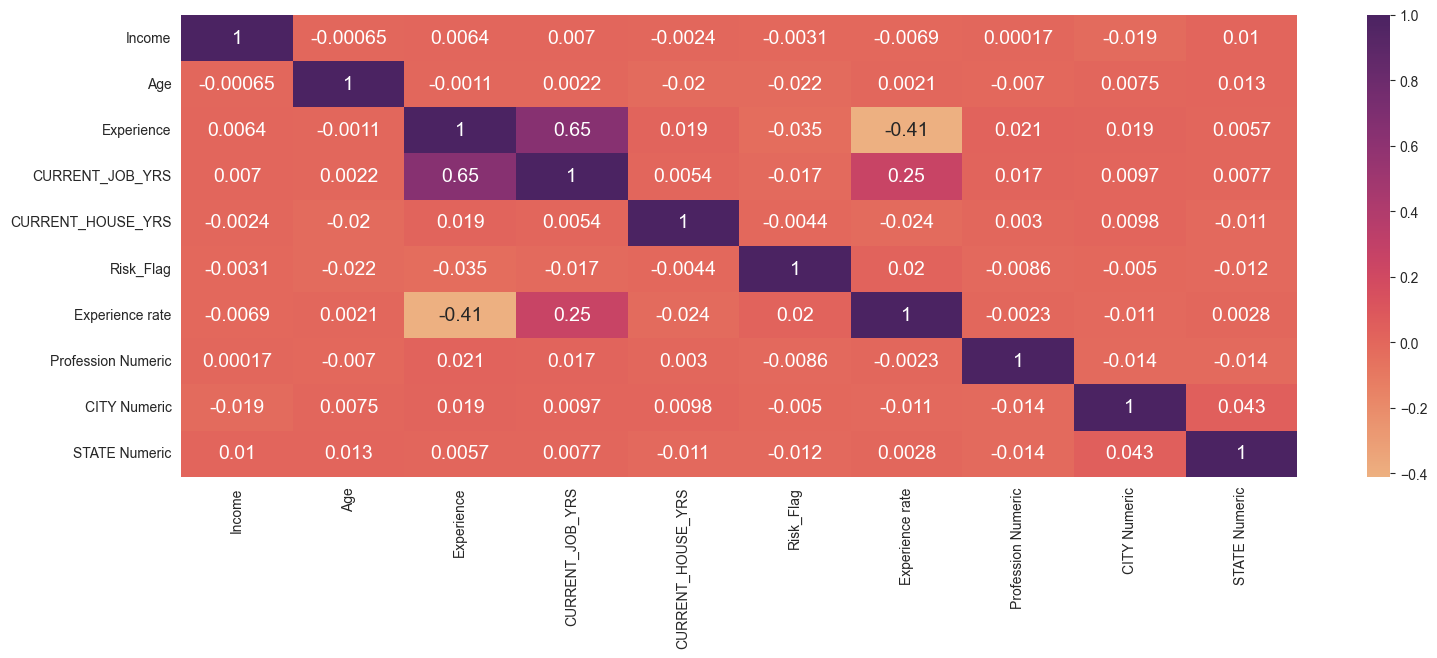

In [46]:
# Correlation of features

fig, ax = plt.subplots( figsize = (18,6) )
corr_matrix = trainDataDropped.corr()
corr_heatmap = sns.heatmap(corr_matrix, cmap = "flare", annot=True, annot_kws={"size": 14})
plt.show()

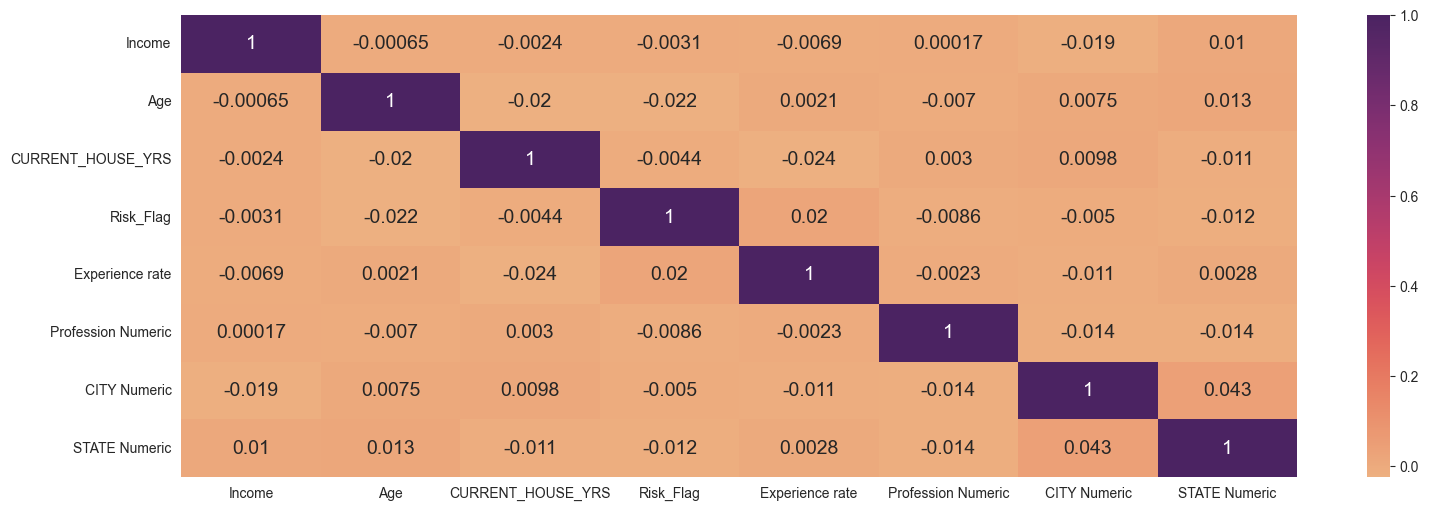

In [47]:
# remove Experience and CURRENT_JOB_YRS, because they are calculated in Experience rate

# Correlation of features

fig, ax = plt.subplots( figsize = (18,6) )
trainDataDropped = trainDataDropped.drop(["CURRENT_JOB_YRS", "Experience"], axis=1)
corr_matrix = trainDataDropped.corr()
corr_heatmap = sns.heatmap(corr_matrix, cmap = "flare", annot=True, annot_kws={"size": 14})
plt.show()

In [48]:
# Correlation with risk flag

featuresCorr = trainDataEncode.corr()["Risk_Flag"].sort_values()
featuresCorr

Experience          -0.034523
Car_Ownership       -0.024036
Age                 -0.021809
CURRENT_JOB_YRS     -0.016942
Profession          -0.004900
CURRENT_HOUSE_YRS   -0.004375
Income              -0.003091
Experience rate      0.020411
Married/Single       0.021092
House_Ownership      0.023622
Id                   0.032153
Risk_Flag            1.000000
Name: Risk_Flag, dtype: float64

**Defining dependent and independent variables**

In [49]:
# Scale
scaler = MinMaxScaler()

for i in [trainDataDropped.columns]:
    trainDataDropped[i] = scaler.fit_transform(trainDataDropped[i])

trainDataDropped.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,0.499198,0.288130,0.0,0.249529,0.499557,0.747495,1.0
Age,252000.0,0.499208,0.294204,0.0,0.241379,0.500000,0.758621,1.0
CURRENT_HOUSE_YRS,252000.0,0.499448,0.349759,0.0,0.250000,0.500000,0.750000,1.0
Risk_Flag,252000.0,0.123000,0.328438,0.0,0.000000,0.000000,0.000000,1.0
Experience rate,252000.0,0.704395,0.312685,0.0,0.454545,0.777778,1.000000,1.0
Profession Numeric,252000.0,0.482436,0.194661,0.0,0.326873,0.493452,0.612362,1.0
CITY Numeric,252000.0,0.475404,0.185706,0.0,0.340580,0.480676,0.608696,1.0
STATE Numeric,252000.0,0.585649,0.308621,0.0,0.300698,0.573151,0.888349,1.0


In [50]:
# Setting up Training and Testing DFs

X = trainDataDropped.drop(columns='Risk_Flag')
y = trainDataDropped['Risk_Flag']

In [51]:
# Define useModel function for all methods
def useModel(model, XData, yData):

    XTrain, XTest, yTrain, yTest = train_test_split(XData, yData, test_size=0.3, random_state=42)

    model = model.fit(XTrain, yTrain)
    yPred = model.predict(XTest)
    print("The Classification report : ")
    print(classification_report(yTest, yPred, zero_division=0))

    # Plotting confusion matrix

    group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)',
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix(yTest, yPred).flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in confusion_matrix(yTest, yPred).flatten()/np.sum(confusion_matrix(yTest, yPred))]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

    labels = np.asarray(labels).reshape(2, 2)
    sns.set_palette(sns.color_palette())
    _, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(yTest, yPred), annot=labels, fmt='', annot_kws={"size": 12})
    # labels = ['False', 'True']
    # ax.set_xticklabels(labels, fontsize=13);
    # ax.set_yticklabels(labels[::-1], fontsize=13);
    ax.set_ylabel('Prediction', fontsize=13);
    ax.set_xlabel('Ground Truth', fontsize=13)
    ax.set_title("Confusion - Matrix")


    falsePositiveRate, truePositiveRate, threshold = roc_curve(yTest, yPred)
    print('roc_auc_score : ', roc_auc_score(yTest, yPred))

    plt.figure()
    lw = 2
    plt.plot(
     falsePositiveRate,
     truePositiveRate,
     color="darkorange",
     lw=lw,
     label="ROC curve (area = %0.2f)" ,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

# KNN

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     66329
         1.0       0.53      0.51      0.52      9271

    accuracy                           0.89     75600
   macro avg       0.73      0.72      0.73     75600
weighted avg       0.88      0.89      0.88     75600

roc_auc_score :  0.7241383930392684


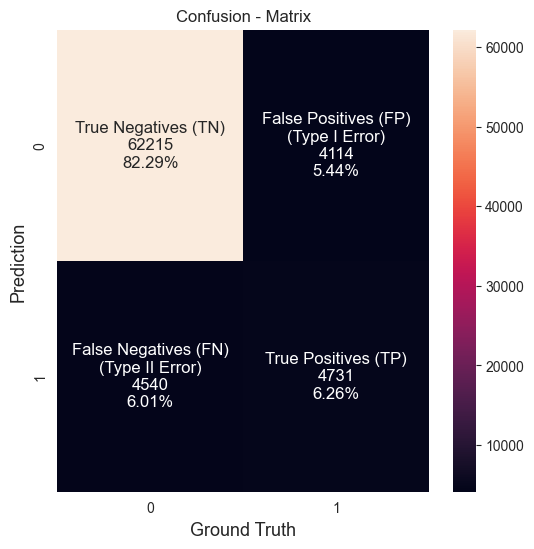

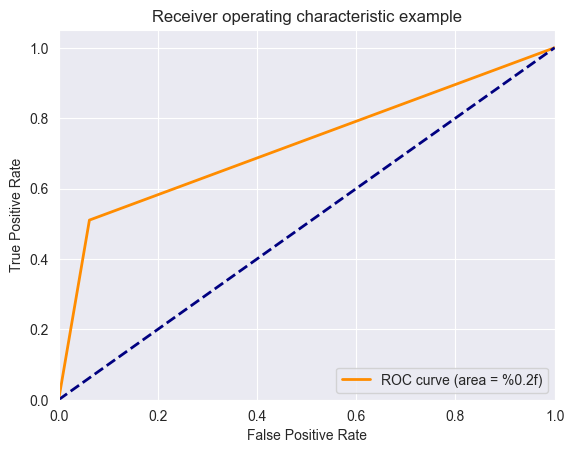

In [52]:
# Using KNN methods

useModel(KNeighborsClassifier(n_neighbors=3), X, y)

# Decision tree

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     66329
         1.0       0.52      0.58      0.55      9271

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.89     75600

roc_auc_score :  0.7510467651650974


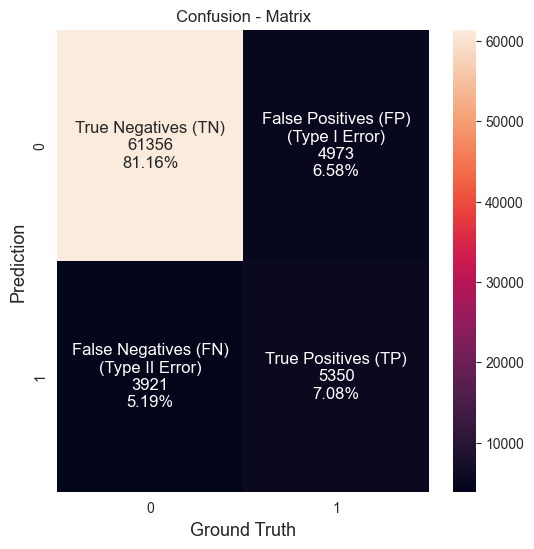

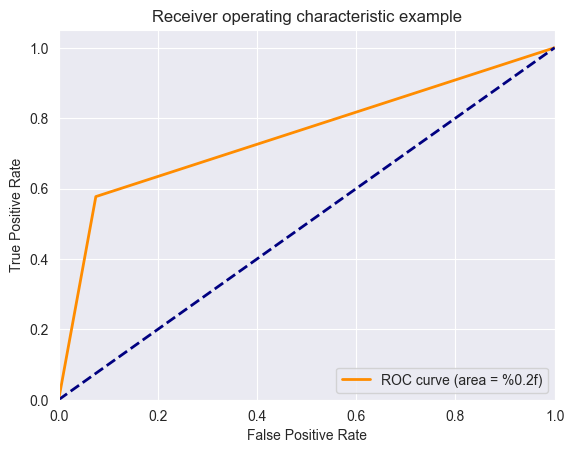

In [53]:
useModel(DecisionTreeClassifier(), X, y)

# Random forest

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

roc_auc_score :  0.7482245055295244


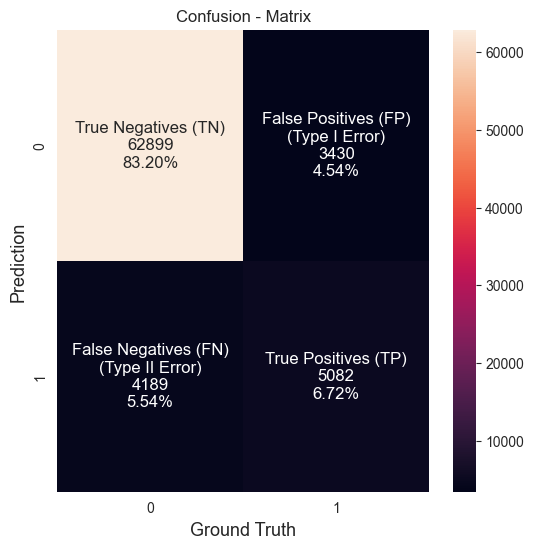

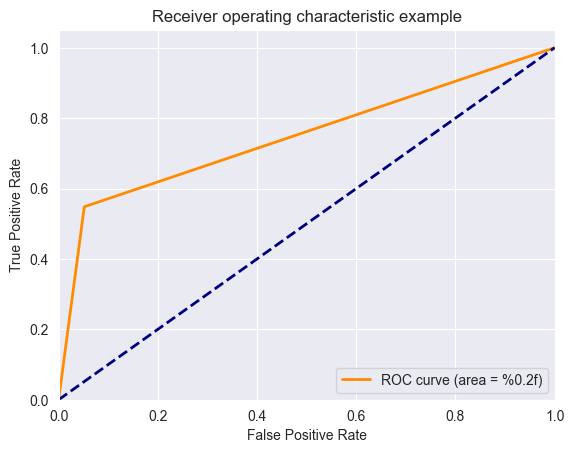

In [54]:
useModel(RandomForestClassifier(), X, y)

# Bagging

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.58      0.55      0.56      9271

    accuracy                           0.90     75600
   macro avg       0.76      0.75      0.75     75600
weighted avg       0.89      0.90      0.90     75600

roc_auc_score :  0.7460772281566224


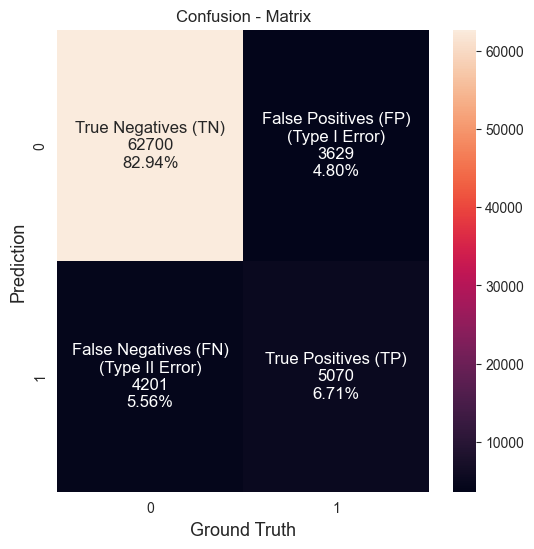

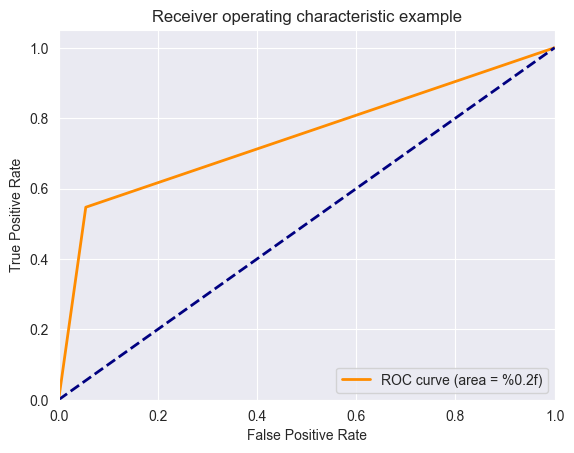

In [55]:
useModel(BaggingClassifier(), X, y)

# Extra tree

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.60      0.53      0.56      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.74      0.75     75600
weighted avg       0.89      0.90      0.90     75600

roc_auc_score :  0.7410915000365104


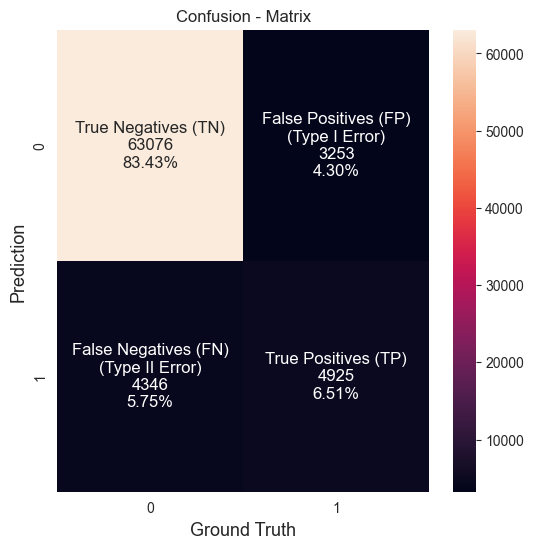

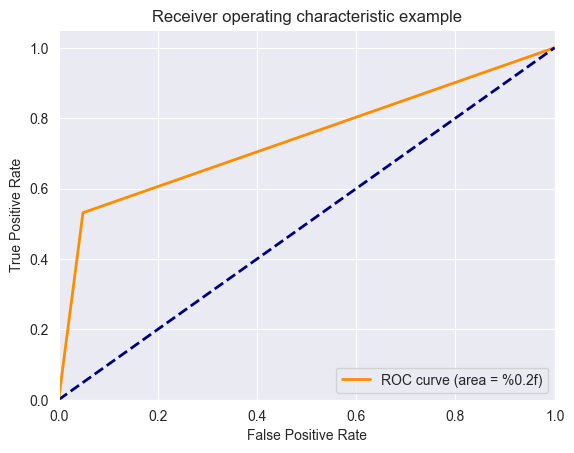

In [56]:
useModel(ExtraTreesClassifier(), X, y)

# Logistic regression

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     66329
         1.0       0.00      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

roc_auc_score :  0.5


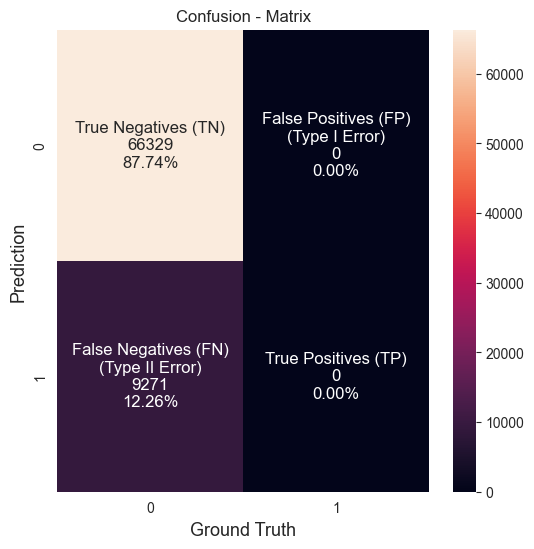

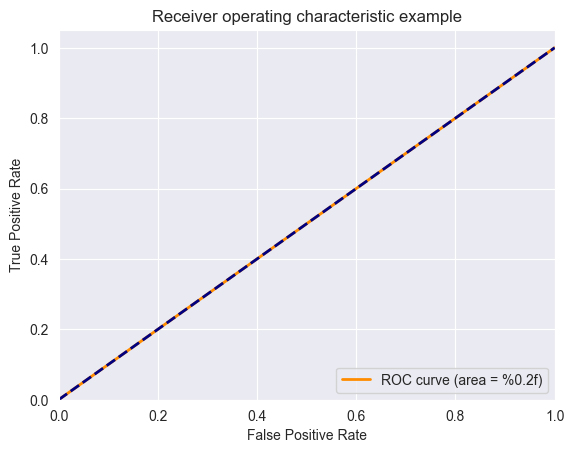

In [57]:
useModel(LogisticRegression(),X, y)

# Choosing model

In [58]:
# Checking train and test accuracy
def getAccuracy(XData, yData, model):

    XTrain, XTest, yTrain, yTest = train_test_split(XData, yData, test_size=0.3, random_state=42)

    model = model.fit(XTrain, yTrain)
    y_pred = model.predict(XTest)
    print("Test Accuracy : ", accuracy_score(yTest, model.predict(XTest)))
    print("Train Accuracy : ", accuracy_score(yTrain, model.predict(XTrain)))

In [59]:
# Random forest is the best classifier, So here the accuracy
getAccuracy(X, y, RandomForestClassifier())

Test Accuracy :  0.898994708994709
Train Accuracy :  0.9373412698412699


In [60]:
# Parameter tuning

paramDist = {
    'n_estimators': randint(10, 20),
    'max_depth': [None] + list(range(5, 20, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

model = RandomForestClassifier()

search = RandomizedSearchCV(estimator=model, param_distributions=paramDist, scoring='accuracy', cv=3, n_iter=10)#, error_score="raise")
search.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023496DE1ED0>},
                   scoring='accuracy')

In [61]:
# Getting the best hyperparameters
bestParams = search.best_params_
bestParams

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 17}

# Feature Importance with Random Forest


In [66]:
grRfModel = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=None, n_estimators= 17, min_samples_split = 10, max_features="sqrt", min_samples_leaf=1)
grRfModel.fit(X, y)

RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=17, random_state=101)

In [67]:
rfFeatureImp = pd.DataFrame(index = X.columns, data = grRfModel.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rfFeatureImp

,Feature Importance
Income,0.218480
CITY Numeric,0.178171
Age,0.163639
Profession Numeric,0.159345
Experience rate,0.107485
STATE Numeric,0.102871
CURRENT_HOUSE_YRS,0.070008


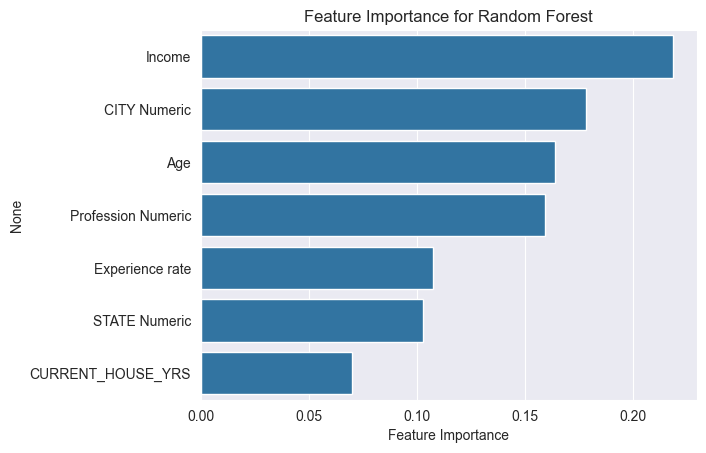

In [68]:
ax = sns.barplot(x=rfFeatureImp["Feature Importance"], y=rfFeatureImp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66329
         1.0       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

roc_auc_score :  0.7486983067456927


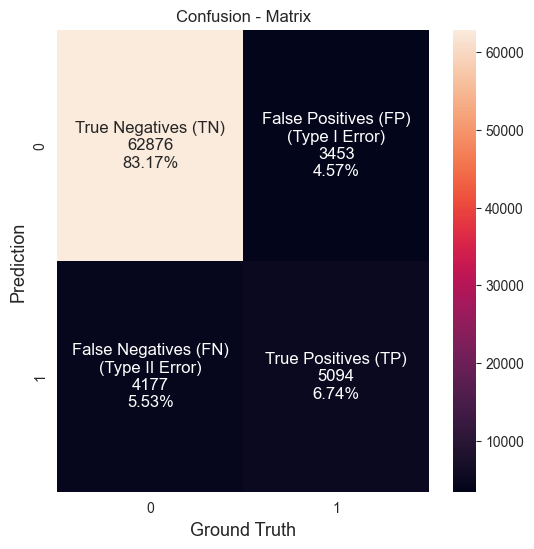

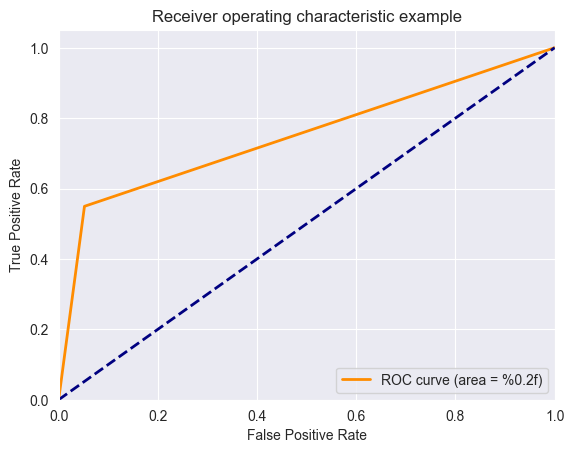

In [69]:
# New Predictions Based on features that have importance

XPrediction = X[["Income", "CITY Numeric", "Age", "Profession Numeric", "Experience rate"]]

useModel(RandomForestClassifier(), XPrediction, y)